In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Step 2: Load the Dataset
df = pd.read_csv("customer_data.csv")

In [3]:
# Step 3: Explore the Dataset
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Shape: (500, 4)

Missing values:
 CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

Duplicate rows: 0

Data types:
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

Summary Statistics:
        CustomerID         Age  Annual Income  Spending Score
count  500.000000  500.000000      500.00000      500.000000
mean   250.500000   44.128000       79.84000       48.214000
std    144.481833   14.985886       39.93038       29.137092
min      1.000000   18.000000       15.00000        1.000000
25%    125.750000   31.000000       44.50000       22.000000
50%    250.500000   45.000000       77.50000       46.000000
75%    375.250000   57.000000      114.00000       73.250000
max    500.000000   69.000000      149.00000      100.000000


In [4]:
# Step 4: Data Preprocessing
features = df[["Age", "Annual Income", "Spending Score"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

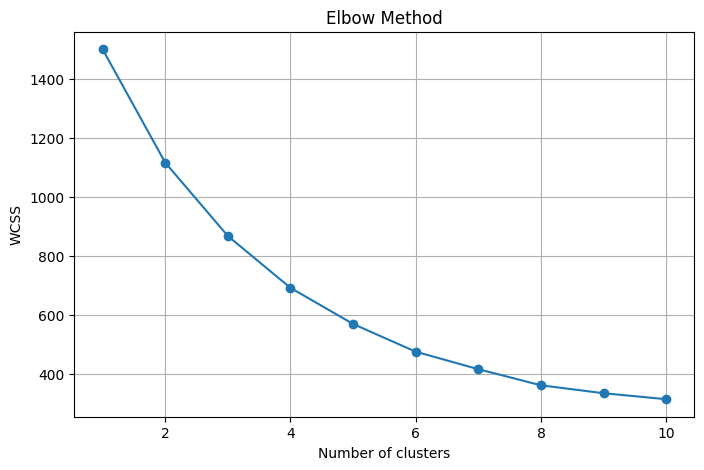

In [5]:
# Step 5: Elbow Method to Determine Optimal Clusters
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [6]:
# Step 6: Silhouette Score (Optional)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.2500
Silhouette Score for k=3: 0.2589
Silhouette Score for k=4: 0.2763
Silhouette Score for k=5: 0.2835
Silhouette Score for k=6: 0.3015
Silhouette Score for k=7: 0.2940
Silhouette Score for k=8: 0.2958
Silhouette Score for k=9: 0.2887
Silhouette Score for k=10: 0.2847


In [7]:
# Step 7: Apply KMeans with Optimal Number of Clusters
optimal_k = 5  # You can choose based on Elbow + Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

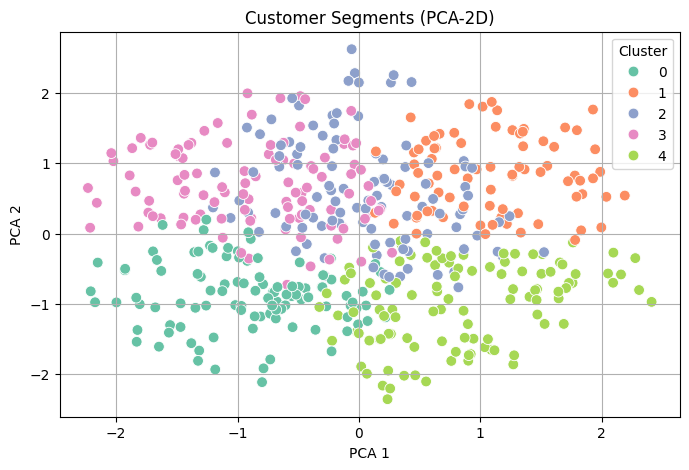

In [8]:
# Step 8: PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster'], palette="Set2", s=60)
plt.title("Customer Segments (PCA-2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

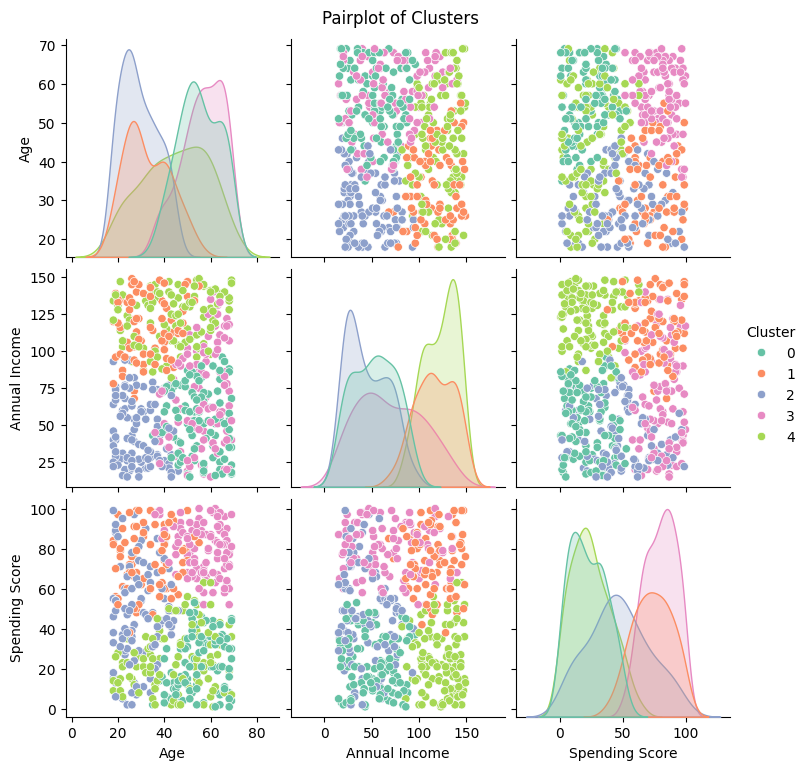

In [9]:
# Step 9: Pairplot
sns.pairplot(df, hue="Cluster", vars=["Age", "Annual Income", "Spending Score"], palette="Set2")
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()

In [10]:
# Step 10: Cluster Centroids (in original scale)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids, columns=["Age", "Annual Income", "Spending Score"])
print("Cluster Centroids:\n", centroid_df)

Cluster Centroids:
          Age  Annual Income  Spending Score
0  54.951923      52.750000       22.711538
1  32.822785     116.443038       73.670886
2  29.152381      45.457143       46.942857
3  56.442308      69.653846       80.019231
4  44.675926     122.388889       24.759259
